<a href="https://colab.research.google.com/github/pccalegari/exemplos-CN/blob/main/MMQ_naoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mínimos Quadrados não lineares**


As funções usadas na aproximação são não lineares nos parâmetros.

Por exemplo, funções racionais, hiperbólicas, exponenciais, como,

$$g(x) = a_1\exp\left(-\dfrac{(a_2-x)^2}{a_3}\right)+a_4\exp\left(-\dfrac{(a_5-x)^2}{a_6}\right).$$

A ideia continua a mesma, minimizar a soma dos quadrados dos resíduos. A diferença é que podemos ter dois caminhos:


*   Se for possível, podemos lienarizar a função aproximadora, resolver o problema linear e depois retornar aos parâmetros originais.
*  Resolver um sistema não linear, obtido a partir do problema de minimizar a função resíduo.

*Exemplo 7:*

1.  Como fazer para aproximar uma função $f$ por uma função $g(x) = a_0\exp(-{a_1x})$?

Note que aplicando $\ln$ em ambos os lados, $g(x) = a_0\exp(-a_1 x) \Longrightarrow \ln(g(x)) = \ln(a_0) - a_1x$. Fazendo $\alpha_0=\ln(a_0)$ e $\alpha_1= - a_1$ temos um problema linear, um ajuste por uma reta, $\ln(y)\approx \alpha_0 + \alpha_1x$. Obtidos $\alpha_0$ e $\alpha_1$ usamos a transformação para obter $a_0$ e $a_1$.

**Obs.** Resolução  em sala!




A seguir um exemplo, de MMQ não linear com a resolução de um sistema não linear.

**Aplicação: Curva de polarização**

Para o ajuste da curva de polarização por meio da função não linear é necessário obter os parâmetros ${\bf a}$ da função,
$$ f(x,{\bf a})= a_0 - a_1x - a_2\ln\left(\frac{x}{a_3} + 1\right) - a_4\exp(a_5x).$$

Nosso objetivo, obter os parâmetros por meio do método dos mínimos quadrados, que minimizam a função,

$$  r({\bf a}) = \dfrac{1}{2}\sum_{i=1}^m r_i({\bf a})^2,$$

sendo ${\bf a}=(a_0,a_1,\ldots,a_m)$, o resíduo $r_i({\bf a}) = f(x_i,{\bf a}) - y_i$, com $(x_i,y_i)$ dados e $m$ tamanho dos vetores $x$ e $y$. O nosso obejtivo é determinar ${\bf a}$ tal que o valor da função resíduo seja mínimo.

**Algoritmo de Gauss-Newton**

Nesse método assume-se que ${\bf a}^k$ está próximo do mínimo e portanto, o resíduo $r_i({\bf a})$ está próximo de zero. A matriz Jacobiana é dada por,

$$J = \left(\begin{array}{cccc}
\dfrac{\partial r_1}{\partial a_0} & \dfrac{\partial r_1}{\partial a_1} & \ldots & \dfrac{\partial r_1}{\partial a_m}\\
\dfrac{\partial r_2}{\partial a_0} & \dfrac{\partial r_2}{\partial a_1} & \ldots & \dfrac{\partial r_2}{\partial a_m}\\
\vdots &\vdots & \ddots & \vdots\\
\dfrac{\partial r_n}{\partial a_0} & \dfrac{\partial r_n}{\partial a_1} & \ldots & \dfrac{\partial r_n}{\partial a_m}\\
\end{array}\right)$$

Para mais detalhes veja [1] e [2].

*Algoritmo*

Entrada: $r_i({\bf a})$, $J$ e ${\bf a}^0$.

Saída: ${\bf a}$


```
itmax = 100
tol = 10**(-6)
it = 1
diff = 1
enquanto(diff > tol e it < itmax) faça
   Calcule r = r(a0)
   Calcule J = J(a0)
   Calcule (J^T)J e (J^T)r
   Resolva o sistema (J^T)Js = -(J^T)r
   a = a0 + s
   diff = max |a|
   a0 = a
   it = it + 1
   
```

Outra alternativa é o método de **Levenberg-Marquardt** onde a minimização da soma dos resíduos se baseia na solução do sistema:

$$(J_k^TJ_k+\lambda_kI)p_k=-J^T_kr_k,$$
onde $J^T$ é a transposta da matriz Jacobiana e $I$ é a matriz identidade.

Um dos métodos utilizado em least_squares do módulo scipy.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html

**Referências:**

[1] Cálculo Numérico Computacional. Peters e Szeremeta, Ed UFSC, 2018.
[2] Métodos Numéricos. Maria Cristina Cunha, Ed. Unicamp, 1993.





*Exemplo 1*

Considere a tabela
$$\begin{array}{c|ccccc}
r & 2.7 & 2 & 1.61 & 1.2 & 1.02\\
\hline
\theta & 48^o & 67^o & 83^o & 108^o & 126^o\\
\end{array}$$

gerada a partr de medidas da posição de um cometa em coordenadas polares. Considere que a órbita do cometa é modelada pela lei de Kepler

$$r = \dfrac{a_0}{1-a_1\cos(\theta)}$$

Implemente o método de Gauss-Newton e MMQ linearizado e compare os resultados.

Parametros: [1.45880043 0.6885461 ]
Residuo: 0.0007039422233697922


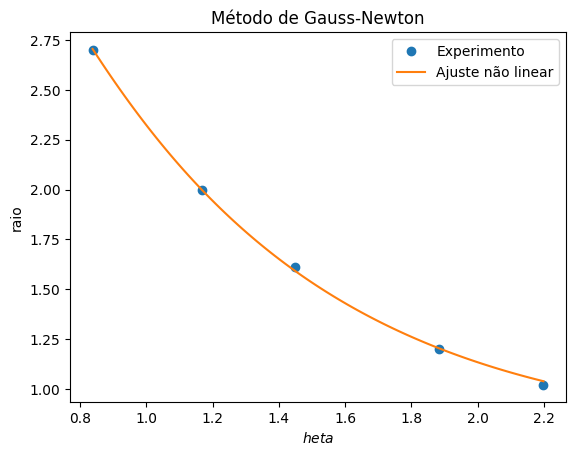

[1.45218597 0.70268355]


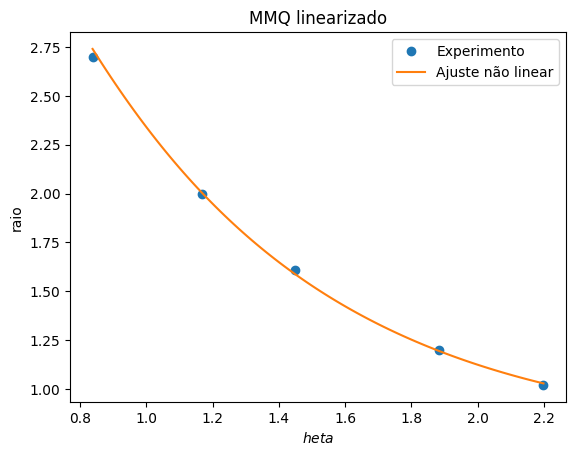

Parametros: [1.45218597 0.70268355]
Residuo: 0.002261937934397607


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import optimize

def fnlinear(x, a):
    return a[0]/(1 - a[1]*np.cos(x))

def rnlinear(x, y, a):
    return y - a[0]/(1 - a[1]*np.cos(x))

def rlinear(x, y, a):
    return y - a[0] - a[1]*np.cos(x)

def J(a, x):
    J = np.zeros((len(x), len(a)))
    J[:, 0] = -1.0/(1 - a[1] * np.cos(x))
    J[:, 1] = -(a[0] * np.cos(x))/(1 - a[1]*np.cos(x))**2
    return J

def gauss_newton(x, y, a0):
    itmax = 100
    tol = 1.0e-6
    it = 1
    diff = 1
    res = np.zeros(len(x))
    a = np.zeros(len(a0))
    while(diff > tol and it < itmax):
        res = rnlinear(x, y, a0)
        Jac = J(a0, x)
        N = np.dot(np.transpose(Jac),Jac)
        b = np.dot(np.transpose(Jac),res)
        s = np.linalg.solve(N,b)
        a = a0 - s
        diff = max(abs(s))
        it = it + 1
        a0 = np.copy(a)
    return a

def mmq(x, y):
    A = np.zeros((len(x), 2))
    for k in range(len(x)):
        A[k][0] = 1
        A[k][1] = np.cos(x[k])
    N = np.dot(np.transpose(A),A)
    b = np.dot(np.transpose(A),y)
    a = np.linalg.solve(N,b)
    return a


y = np.array([2.7, 2, 1.61, 1.2, 1.02])
t = np.array([48, 67, 83, 108, 126])
x = t*np.pi/180

a0 = np.array([2,1])

a = gauss_newton(x, y, a0)

print("Parametros:", a)
resi = np.sum((y - fnlinear(x, a))**2)
print("Residuo:", resi)
xi = x[0]
xf = x[len(x)-1]

xx = np.linspace(xi, xf, 100)
yy = fnlinear(xx, a)

plt.figure(1)
plt.plot(x, y, 'o', label='Experimento')
plt.plot(xx, yy, label='Ajuste não linear')
plt.xlabel("$\theta$")
plt.ylabel("raio")
plt.legend()
plt.title("Método de Gauss-Newton")
plt.show()

ly = 1/y
a1 = mmq(x, ly)
p = np.zeros(len(a1))
p[0] = 1/a1[0]
p[1] = -a1[1]*p[0]
print(p)

xx = np.linspace(xi, xf, 100)
ny = fnlinear(xx, p)

plt.figure(1)
plt.plot(x, y, 'o', label='Experimento')
plt.plot(xx, ny, label='Ajuste não linear')
plt.xlabel("$\theta$")
plt.ylabel("raio")
plt.legend()
plt.title("MMQ linearizado")
plt.show()

print("Parametros:", p)
resi = np.sum((y - fnlinear(x, p))**2)
print("Residuo:", resi)


Parâmetros do ajuste Não linear
     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-2.628e-03 -3.319e-03  6.923e-03 -5.406e-03  1.947e-03
               -9.921e-03  1.136e-02 -1.623e-03]
           x: [ 6.394e-02  3.672e-05  5.056e+01  2.628e-03  9.688e+02]
        cost: 0.0001645117796417646
         jac: [[ 0.000e+00  0.000e+00 ... -1.000e+00  0.000e+00]
               [-2.634e+00  1.616e+03 ... -1.584e+00 -1.978e-06]
               ...
               [-4.476e+00  1.721e+03 ... -2.199e+01 -1.843e-04]
               [-4.664e+00  1.724e+03 ... -4.208e+01 -4.268e-04]]
        grad: [-6.906e-08  3.285e-05 -4.307e-11 -3.593e-07  1.540e-11]
  optimality: 3.2852787484216606e-05
 active_mask: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
        nfev: 58
        njev: 49
a =  [6.39403286e-02 3.67245704e-05 5.05566944e+01 2.62798665e-03
 9.68782079e+02]


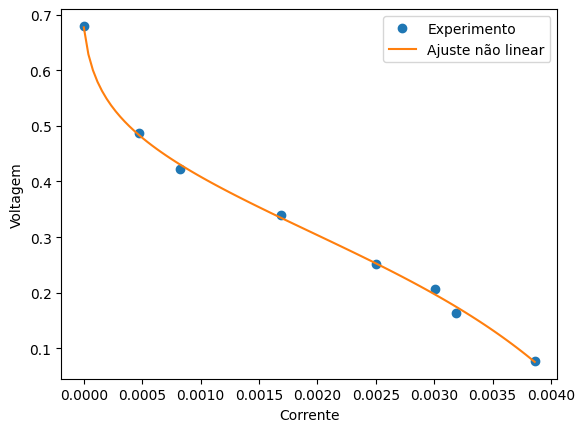

In [ ]:
#Exemplo curva de polarização, usando o módulo scipy

import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

def fnlinear(x, a):
    y = 0.6795 - a[0]*np.log(x/a[1] + 1.0) - a[2]*x- a[3]*np.exp(a[4]*x)
    return y

def flinear(t, a, b):
    y = a - b*t
    return y

def rnlinear(a, x, y):
    return 0.6795 - a[0]*np.log(x/a[1] + 1.0) - a[2]*x - a[3]*np.exp(a[4]*x) - y

def rlinear(x, t, y):
    return x[0] - x[1]*t - y

i = np.array([0, 4.75*10**(-4), 8.27*10**(-4), 1.69*10**(-3), 2.5*10**(-3), 3.01*10**(-3), 3.19*10**(-3), 3.86*10**(-3)])
n = len(i)
v = np.array([0.6795, 0.4862, 0.423, 0.33975, 0.25075, 0.2062, 0.1629, 0.07715])

i_min = i[0]
i_max = i[n-1]

x0 = np.array([0.0, 0.1, 1, 0.0, 500.0])

res_lsq = optimize.least_squares(rnlinear, x0, args=(i, v))

print("Parâmetros do ajuste Não linear")
print(res_lsq)
a = np.zeros(len(x0))
for k in range(len(x0)):
    a[k] = res_lsq.x[k]

print("a = ", a)

i_test = np.linspace(i_min, i_max, 100)

y_lsq = fnlinear(i_test, a)


plt.figure(2)
plt.plot(i, v, 'o', label='Experimento')
plt.plot(i_test, y_lsq, label='Ajuste não linear')
plt.xlabel("Corrente")
plt.ylabel("Voltagem")
plt.legend()
plt.show()